In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [123]:
train_df = pd.read_csv('data/train.csv')
train_df = train_df.drop('PassengerId',axis=1)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [124]:
def prepare_missing_summary(some_df):
    count_of_null = some_df.isnull().sum().sort_values(ascending=False)
    percentage_of_null = (some_df.isnull().sum()/some_df.isnull().count()).sort_values(ascending=False)
    return pd.concat([count_of_null,percentage_of_null],axis=1,keys=['Total','Percentage'])

prepare_missing_summary(train_df)

,Total,Percentage
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


In [125]:
train_df['Family'] = train_df['Parch']+train_df['SibSp']
train_df = train_df.drop(['Cabin','Ticket','Name','Parch','SibSp'],axis=1)
train_df = train_df.drop(train_df.loc[train_df['Embarked'].isnull()].index)
train_df['Age'].fillna((train_df['Age'].mean()), inplace=True)

In [126]:
prepare_missing_summary(train_df)

,Total,Percentage
Family,0,0.0
Embarked,0,0.0
Fare,0,0.0
Age,0,0.0
Sex,0,0.0
Pclass,0,0.0
Survived,0,0.0


In [127]:
train_df['Sex'] = train_df['Sex'].astype('category')
train_df['Sex'] = train_df['Sex'].cat.codes

train_df=pd.get_dummies(train_df, columns=['Embarked'])

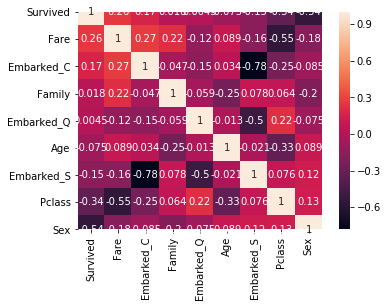

In [128]:
corrmat = train_df.corr()
cols = corrmat.nlargest(10, 'Survived')['Survived'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.heatmap(cm, square=True, annot=True, yticklabels=cols.values, xticklabels=cols.values)
#DELETE FARE

In [129]:
# sns.set()
# sns.pairplot(train_df[train_df.columns])
# plt.show()
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Family,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,7.2500,1,0,0,1
1,1,1,0,38.0,71.2833,1,1,0,0
2,1,3,0,26.0,7.9250,0,0,0,1
3,1,1,0,35.0,53.1000,1,0,0,1
4,0,3,1,35.0,8.0500,0,0,0,1


In [130]:
from sklearn.model_selection import cross_val_score
y=train_df.pop('Survived')
x=train_df

In [131]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV()#RandomForestClassifier(n_estimators=1000)
k=5
sum([cross_val_score(clf, x, y, cv=5).mean() for i in range(k)])/k

0.7930616390528789

In [132]:
clf2 = LogisticRegressionCV()
clf2 = clf2.fit(x, y)

In [133]:
test_df = pd.read_csv('data/test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [134]:
prepare_missing_summary(test_df)

,Total,Percentage
Cabin,327,0.782297
Age,86,0.205742
Fare,1,0.002392
Embarked,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


In [135]:
test_df['Fare'] = np.where(test_df['Fare'].isnull(),test_df['Fare'].mean(),test_df['Fare'])
test_df['Family'] = test_df['Parch']+test_df['SibSp']
test_df = test_df.drop(['Cabin','Ticket','Name','Parch','SibSp'],axis=1)
test_df['Age'].fillna((test_df['Age'].mean()), inplace=True)
test_df['Sex'] = test_df['Sex'].astype('category')
test_df['Sex'] = test_df['Sex'].cat.codes

test_df=pd.get_dummies(test_df, columns=['Embarked'])
test_df = test_df.set_index('PassengerId')
print(test_df['Fare'].mean())
print(test_df.loc[1044])
test_df.head()

35.6271884892086
Pclass         3.000000
Sex            1.000000
Age           60.500000
Fare          35.627188
Family         0.000000
Embarked_C     0.000000
Embarked_Q     0.000000
Embarked_S     1.000000
Name: 1044, dtype: float64


,Pclass,Sex,Age,Fare,Family,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,
892,3,1,34.5,7.8292,0,0,1,0
893,3,0,47.0,7.0000,1,0,0,1
894,2,1,62.0,9.6875,0,0,1,0
895,3,1,27.0,8.6625,0,0,0,1
896,3,0,22.0,12.2875,2,0,0,1


In [136]:
prepare_missing_summary(test_df)
print(test_df.columns)
train_df.columns

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Family', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')


Index(['Pclass', 'Sex', 'Age', 'Fare', 'Family', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [137]:
predictions = clf2.predict(test_df)
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [138]:
result = pd.DataFrame(predictions,test_df.index,columns=['Survived'])
result.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [139]:
result.to_csv('data/result.csv')